# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
# YOUR CODE HERE
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1200, centers=7, n_features=8,random_state=1, cluster_std=8)

In [2]:
print(X.shape, y.shape)

(1200, 8) (1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

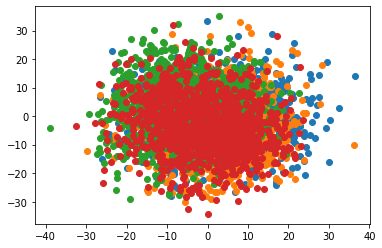

In [3]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,7])
plt.scatter(X[:,1],X[:,6])
plt.scatter(X[:,2],X[:,5])
plt.scatter(X[:,3],X[:,4])


❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

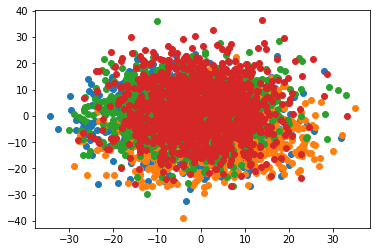

In [4]:
# YOUR CODE HERE
plt.scatter(X[:,4],X[:,3])
plt.scatter(X[:,5],X[:,2])
plt.scatter(X[:,6],X[:,1])
plt.scatter(X[:,7],X[:,0])

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [5]:
# YOUR CODE HERE
from tensorflow.keras.utils import to_categorical

y.dtype

2022-09-08 20:06:57.749120: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 20:06:57.749192: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


dtype('int64')

In [6]:
y_cat = to_categorical(y, num_classes=8, dtype='int64')
y_cat

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
y_train = scaler.transform(y_train)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [10]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    model.add(layers.Dense(8, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

2022-09-08 20:07:28.203412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-08 20:07:28.203879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 20:07:28.203993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-08 20:07:28.204065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-08 20:07:28.204130: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [11]:
# YOUR CODE HERE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 8)                 408       
                                                                 
Total params: 858
Trainable params: 858
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [27]:
# YOUR CODE HERE
history = model.fit(X_train, y_train, batch_size=2, epochs=50)


Epoch 1/50
420/420 [==============================] - 1s 2ms/step - loss: -47630.4180 - accuracy: 0.7048
Epoch 2/50
420/420 [==============================] - 1s 2ms/step - loss: -49010.6953 - accuracy: 0.7357
Epoch 3/50
420/420 [==============================] - 1s 2ms/step - loss: -50383.3398 - accuracy: 0.7452
Epoch 4/50
420/420 [==============================] - 1s 2ms/step - loss: -51763.4336 - accuracy: 0.7667
Epoch 5/50
420/420 [==============================] - 1s 2ms/step - loss: -53157.7109 - accuracy: 0.7583
Epoch 6/50
420/420 [==============================] - 1s 2ms/step - loss: -54568.1055 - accuracy: 0.8083
Epoch 7/50
420/420 [==============================] - 1s 2ms/step - loss: -55997.1797 - accuracy: 0.7810
Epoch 8/50
420/420 [==============================] - 1s 2ms/step - loss: -57443.1445 - accuracy: 0.7881
Epoch 9/50
420/420 [==============================] - 1s 2ms/step - loss: -58909.7578 - accuracy: 0.7786
Epoch 10/50
420/420 [==============================] - 

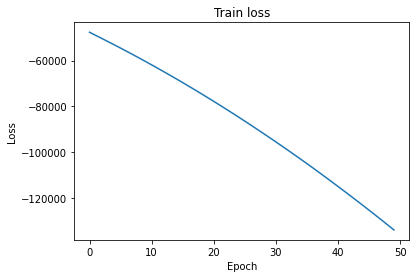

In [28]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    
plot_history(history)

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [29]:
# YOUR CODE HERE
model.evaluate(scaler.transform(X_test), y_test)[1]

12/12 [==============================] - 0s 2ms/step - loss: 83552.7656 - accuracy: 0.1417


0.14166666567325592

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [30]:
accuracy_baseline = model.evaluate(scaler.transform(X_test), y_test)[1]

12/12 [==============================] - 0s 2ms/step - loss: 83552.7656 - accuracy: 0.1417


🧪 **Test your code**

In [31]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/03-Multiclass-classification
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_baseline.py::TestBaseline::test_accuracy PASSED               [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master


❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [32]:
# YOUR CODE HERE
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Epoch 1/1000
27/27 [==============================] - 0s 3ms/step - loss: -135217.4062 - accuracy: 0.8095
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: -135359.0625 - accuracy: 0.9274
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: -135500.5781 - accuracy: 0.9310
Epoch 4/1000
27/27 [==============================] - 0s 3ms/step - loss: -135642.2812 - accuracy: 0.9190
Epoch 5/1000
27/27 [==============================] - 0s 3ms/step - loss: -135784.5000 - accuracy: 0.9238
Epoch 6/1000
27/27 [==============================] - 0s 3ms/step - loss: -135926.7188 - accuracy: 0.9345
Epoch 7/1000
27/27 [==============================] - 0s 3ms/step - loss: -136069.5000 - accuracy: 0.9298
Epoch 8/1000
27/27 [==============================] - 0s 3ms/step - loss: -136213.2500 - accuracy: 0.9238
Epoch 9/1000
27/27 [==============================] - 0s 3ms/step - loss: -136357.1719 - accuracy: 0.9274
Epoch 10/1000
27/27 [=========================

27/27 [==============================] - 0s 4ms/step - loss: -146734.7969 - accuracy: 0.9286
Epoch 78/1000
27/27 [==============================] - 0s 2ms/step - loss: -146894.3281 - accuracy: 0.9310
Epoch 79/1000
27/27 [==============================] - 0s 2ms/step - loss: -147054.2031 - accuracy: 0.9250
Epoch 80/1000
27/27 [==============================] - 0s 3ms/step - loss: -147214.3125 - accuracy: 0.9083
Epoch 81/1000
27/27 [==============================] - 0s 3ms/step - loss: -147374.8438 - accuracy: 0.9345
Epoch 82/1000
27/27 [==============================] - 0s 2ms/step - loss: -147536.2031 - accuracy: 0.9202
Epoch 83/1000
27/27 [==============================] - 0s 3ms/step - loss: -147696.5938 - accuracy: 0.9310
Epoch 84/1000
27/27 [==============================] - 0s 2ms/step - loss: -147857.3594 - accuracy: 0.9226
Epoch 85/1000
27/27 [==============================] - 0s 2ms/step - loss: -148018.5469 - accuracy: 0.9321
Epoch 86/1000
27/27 [==============================

27/27 [==============================] - 0s 3ms/step - loss: -159292.9375 - accuracy: 0.9286
Epoch 154/1000
27/27 [==============================] - 0s 3ms/step - loss: -159462.1250 - accuracy: 0.9262
Epoch 155/1000
27/27 [==============================] - 0s 2ms/step - loss: -159631.3438 - accuracy: 0.9155
Epoch 156/1000
27/27 [==============================] - 0s 2ms/step - loss: -159801.4844 - accuracy: 0.9286
Epoch 157/1000
27/27 [==============================] - 0s 3ms/step - loss: -159971.6406 - accuracy: 0.9298
Epoch 158/1000
27/27 [==============================] - 0s 3ms/step - loss: -160142.4062 - accuracy: 0.9179
Epoch 159/1000
27/27 [==============================] - 0s 2ms/step - loss: -160311.7344 - accuracy: 0.9298
Epoch 160/1000
27/27 [==============================] - 0s 3ms/step - loss: -160482.4531 - accuracy: 0.9286
Epoch 161/1000
27/27 [==============================] - 0s 2ms/step - loss: -160652.6406 - accuracy: 0.9202
Epoch 162/1000
27/27 [=====================

Epoch 229/1000
27/27 [==============================] - 0s 3ms/step - loss: -172486.6875 - accuracy: 0.9333
Epoch 230/1000
27/27 [==============================] - 0s 2ms/step - loss: -172664.6094 - accuracy: 0.9333
Epoch 231/1000
27/27 [==============================] - 0s 3ms/step - loss: -172842.3125 - accuracy: 0.9369
Epoch 232/1000
27/27 [==============================] - 0s 2ms/step - loss: -173019.3125 - accuracy: 0.9345
Epoch 233/1000
27/27 [==============================] - 0s 2ms/step - loss: -173198.6719 - accuracy: 0.9298
Epoch 234/1000
27/27 [==============================] - 0s 2ms/step - loss: -173377.2188 - accuracy: 0.9393
Epoch 235/1000
27/27 [==============================] - 0s 2ms/step - loss: -173555.0156 - accuracy: 0.9393
Epoch 236/1000
27/27 [==============================] - 0s 2ms/step - loss: -173732.9688 - accuracy: 0.9381
Epoch 237/1000
27/27 [==============================] - 0s 2ms/step - loss: -173911.0625 - accuracy: 0.9357
Epoch 238/1000
27/27 [======

27/27 [==============================] - 0s 3ms/step - loss: -186043.9062 - accuracy: 0.9119
Epoch 305/1000
27/27 [==============================] - 0s 2ms/step - loss: -186228.2500 - accuracy: 0.9214
Epoch 306/1000
27/27 [==============================] - 0s 3ms/step - loss: -186412.2656 - accuracy: 0.9095
Epoch 307/1000
27/27 [==============================] - 0s 3ms/step - loss: -186595.5312 - accuracy: 0.9393
Epoch 308/1000
27/27 [==============================] - 0s 2ms/step - loss: -186780.2656 - accuracy: 0.9274
Epoch 309/1000
27/27 [==============================] - 0s 2ms/step - loss: -186963.8438 - accuracy: 0.9381
Epoch 310/1000
27/27 [==============================] - 0s 2ms/step - loss: -187149.0625 - accuracy: 0.9262
Epoch 311/1000
27/27 [==============================] - 0s 2ms/step - loss: -187336.1562 - accuracy: 0.9345
Epoch 312/1000
27/27 [==============================] - 0s 2ms/step - loss: -187520.7188 - accuracy: 0.9298
Epoch 313/1000
27/27 [=====================

Epoch 380/1000
27/27 [==============================] - 0s 3ms/step - loss: -200313.7500 - accuracy: 0.9167
Epoch 381/1000
27/27 [==============================] - 0s 2ms/step - loss: -200503.4062 - accuracy: 0.9226
Epoch 382/1000
27/27 [==============================] - 0s 2ms/step - loss: -200694.2812 - accuracy: 0.9012
Epoch 383/1000
27/27 [==============================] - 0s 3ms/step - loss: -200885.8125 - accuracy: 0.9250
Epoch 384/1000
27/27 [==============================] - 0s 2ms/step - loss: -201077.8594 - accuracy: 0.9250
Epoch 385/1000
27/27 [==============================] - 0s 3ms/step - loss: -201268.0625 - accuracy: 0.9167
Epoch 386/1000
27/27 [==============================] - 0s 2ms/step - loss: -201460.1406 - accuracy: 0.9190
Epoch 387/1000
27/27 [==============================] - 0s 3ms/step - loss: -201651.3594 - accuracy: 0.9143
Epoch 388/1000
27/27 [==============================] - 0s 2ms/step - loss: -201843.1094 - accuracy: 0.9214
Epoch 389/1000
27/27 [======

27/27 [==============================] - 0s 3ms/step - loss: -214895.9688 - accuracy: 0.9071
Epoch 456/1000
27/27 [==============================] - 0s 3ms/step - loss: -215095.0469 - accuracy: 0.8940
Epoch 457/1000
27/27 [==============================] - 0s 3ms/step - loss: -215292.1719 - accuracy: 0.9071
Epoch 458/1000
27/27 [==============================] - 0s 3ms/step - loss: -215492.5000 - accuracy: 0.9048
Epoch 459/1000
27/27 [==============================] - 0s 3ms/step - loss: -215691.2969 - accuracy: 0.8917
Epoch 460/1000
27/27 [==============================] - 0s 3ms/step - loss: -215889.1406 - accuracy: 0.9060
Epoch 461/1000
27/27 [==============================] - 0s 3ms/step - loss: -216088.0938 - accuracy: 0.9071
Epoch 462/1000
27/27 [==============================] - 0s 3ms/step - loss: -216285.3125 - accuracy: 0.9048
Epoch 463/1000
27/27 [==============================] - 0s 3ms/step - loss: -216483.9062 - accuracy: 0.9012
Epoch 464/1000
27/27 [=====================

Epoch 531/1000
27/27 [==============================] - 0s 3ms/step - loss: -230199.8906 - accuracy: 0.8833
Epoch 532/1000
27/27 [==============================] - 0s 3ms/step - loss: -230403.8281 - accuracy: 0.8917
Epoch 533/1000
27/27 [==============================] - 0s 3ms/step - loss: -230607.8438 - accuracy: 0.8893
Epoch 534/1000
27/27 [==============================] - 0s 3ms/step - loss: -230813.8438 - accuracy: 0.9036
Epoch 535/1000
27/27 [==============================] - 0s 3ms/step - loss: -231018.0156 - accuracy: 0.8881
Epoch 536/1000
27/27 [==============================] - 0s 2ms/step - loss: -231224.0000 - accuracy: 0.9095
Epoch 537/1000
27/27 [==============================] - 0s 3ms/step - loss: -231427.6250 - accuracy: 0.8929
Epoch 538/1000
27/27 [==============================] - 0s 3ms/step - loss: -231634.1406 - accuracy: 0.8905
Epoch 539/1000
27/27 [==============================] - 0s 3ms/step - loss: -231839.8281 - accuracy: 0.9036
Epoch 540/1000
27/27 [======

27/27 [==============================] - 0s 3ms/step - loss: -245818.9531 - accuracy: 0.8845
Epoch 607/1000
27/27 [==============================] - 0s 3ms/step - loss: -246029.9062 - accuracy: 0.8738
Epoch 608/1000
27/27 [==============================] - 0s 2ms/step - loss: -246242.8438 - accuracy: 0.8440
Epoch 609/1000
27/27 [==============================] - 0s 2ms/step - loss: -246456.5469 - accuracy: 0.8881
Epoch 610/1000
27/27 [==============================] - 0s 3ms/step - loss: -246669.5781 - accuracy: 0.8810
Epoch 611/1000
27/27 [==============================] - 0s 2ms/step - loss: -246882.0312 - accuracy: 0.8869
Epoch 612/1000
27/27 [==============================] - 0s 3ms/step - loss: -247094.1094 - accuracy: 0.8833
Epoch 613/1000
27/27 [==============================] - 0s 3ms/step - loss: -247305.3750 - accuracy: 0.8738
Epoch 614/1000
27/27 [==============================] - 0s 2ms/step - loss: -247515.7344 - accuracy: 0.8810
Epoch 615/1000
27/27 [=====================

Epoch 682/1000
27/27 [==============================] - 0s 3ms/step - loss: -262162.3438 - accuracy: 0.8583
Epoch 683/1000
27/27 [==============================] - 0s 3ms/step - loss: -262379.5625 - accuracy: 0.8714
Epoch 684/1000
27/27 [==============================] - 0s 3ms/step - loss: -262599.7812 - accuracy: 0.8798
Epoch 685/1000
27/27 [==============================] - 0s 3ms/step - loss: -262817.3750 - accuracy: 0.8702
Epoch 686/1000
27/27 [==============================] - 0s 2ms/step - loss: -263037.1562 - accuracy: 0.8643
Epoch 687/1000
27/27 [==============================] - 0s 3ms/step - loss: -263256.6562 - accuracy: 0.8726
Epoch 688/1000
27/27 [==============================] - 0s 2ms/step - loss: -263476.8438 - accuracy: 0.8726
Epoch 689/1000
27/27 [==============================] - 0s 3ms/step - loss: -263694.8438 - accuracy: 0.8726
Epoch 690/1000
27/27 [==============================] - 0s 3ms/step - loss: -263914.8125 - accuracy: 0.8738
Epoch 691/1000
27/27 [======

27/27 [==============================] - 0s 3ms/step - loss: -278814.8125 - accuracy: 0.8321
Epoch 758/1000
27/27 [==============================] - 0s 2ms/step - loss: -279042.2500 - accuracy: 0.8429
Epoch 759/1000
27/27 [==============================] - 0s 3ms/step - loss: -279267.3438 - accuracy: 0.8095
Epoch 760/1000
27/27 [==============================] - 0s 3ms/step - loss: -279491.0312 - accuracy: 0.8619
Epoch 761/1000
27/27 [==============================] - 0s 2ms/step - loss: -279715.4375 - accuracy: 0.8583
Epoch 762/1000
27/27 [==============================] - 0s 3ms/step - loss: -279938.9375 - accuracy: 0.8560
Epoch 763/1000
27/27 [==============================] - 0s 3ms/step - loss: -280163.7812 - accuracy: 0.8583
Epoch 764/1000
27/27 [==============================] - 0s 2ms/step - loss: -280388.0000 - accuracy: 0.8560
Epoch 765/1000
27/27 [==============================] - 0s 2ms/step - loss: -280613.9375 - accuracy: 0.8607
Epoch 766/1000
27/27 [=====================

Epoch 833/1000
27/27 [==============================] - 0s 3ms/step - loss: -296178.7188 - accuracy: 0.8488
Epoch 834/1000
27/27 [==============================] - 0s 3ms/step - loss: -296413.8438 - accuracy: 0.8571
Epoch 835/1000
27/27 [==============================] - 0s 2ms/step - loss: -296643.7812 - accuracy: 0.8417
Epoch 836/1000
27/27 [==============================] - 0s 3ms/step - loss: -296877.6875 - accuracy: 0.8560
Epoch 837/1000
27/27 [==============================] - 0s 3ms/step - loss: -297109.0938 - accuracy: 0.8524
Epoch 838/1000
27/27 [==============================] - 0s 3ms/step - loss: -297342.3750 - accuracy: 0.8417
Epoch 839/1000
27/27 [==============================] - 0s 3ms/step - loss: -297576.2812 - accuracy: 0.8571
Epoch 840/1000
27/27 [==============================] - 0s 2ms/step - loss: -297808.8750 - accuracy: 0.8655
Epoch 841/1000
27/27 [==============================] - 0s 3ms/step - loss: -298042.6562 - accuracy: 0.8405
Epoch 842/1000
27/27 [======

27/27 [==============================] - 0s 3ms/step - loss: -313839.4062 - accuracy: 0.8536
Epoch 909/1000
27/27 [==============================] - 0s 3ms/step - loss: -314076.4688 - accuracy: 0.8417
Epoch 910/1000
27/27 [==============================] - 0s 2ms/step - loss: -314315.7188 - accuracy: 0.8548
Epoch 911/1000
27/27 [==============================] - 0s 2ms/step - loss: -314555.8438 - accuracy: 0.8536
Epoch 912/1000
27/27 [==============================] - 0s 2ms/step - loss: -314794.2188 - accuracy: 0.7762
Epoch 913/1000
27/27 [==============================] - 0s 2ms/step - loss: -315034.1562 - accuracy: 0.8452
Epoch 914/1000
27/27 [==============================] - 0s 2ms/step - loss: -315271.6562 - accuracy: 0.8548
Epoch 915/1000
27/27 [==============================] - 0s 2ms/step - loss: -315510.7812 - accuracy: 0.8583
Epoch 916/1000
27/27 [==============================] - 0s 2ms/step - loss: -315750.7500 - accuracy: 0.8274
Epoch 917/1000
27/27 [=====================

Epoch 984/1000
27/27 [==============================] - 0s 3ms/step - loss: -332234.7812 - accuracy: 0.8548
Epoch 985/1000
27/27 [==============================] - 0s 3ms/step - loss: -332479.9688 - accuracy: 0.8595
Epoch 986/1000
27/27 [==============================] - 0s 2ms/step - loss: -332725.5000 - accuracy: 0.8357
Epoch 987/1000
27/27 [==============================] - 0s 3ms/step - loss: -332973.0000 - accuracy: 0.8464
Epoch 988/1000
27/27 [==============================] - 0s 2ms/step - loss: -333219.9375 - accuracy: 0.8440
Epoch 989/1000
27/27 [==============================] - 0s 3ms/step - loss: -333466.2812 - accuracy: 0.8619
Epoch 990/1000
27/27 [==============================] - 0s 2ms/step - loss: -333712.1250 - accuracy: 0.8381
Epoch 991/1000
27/27 [==============================] - 0s 3ms/step - loss: -333959.4688 - accuracy: 0.8262
Epoch 992/1000
27/27 [==============================] - 0s 3ms/step - loss: -334207.4375 - accuracy: 0.8429
Epoch 993/1000
27/27 [======

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [33]:
# YOUR CODE HERE
model.evaluate(scaler.transform(X_test), y_test)

12/12 [==============================] - 0s 2ms/step - loss: 195014.4062 - accuracy: 0.1694


[195014.40625, 0.16944444179534912]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

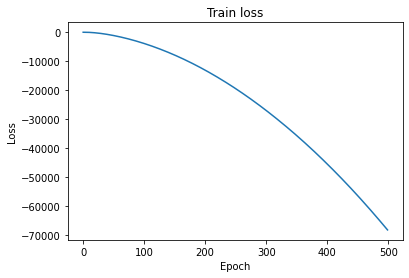

In [34]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [35]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

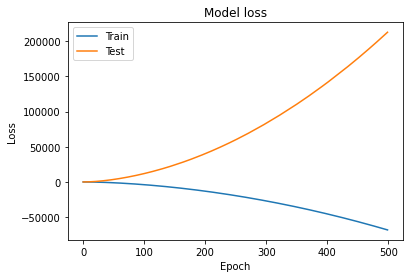

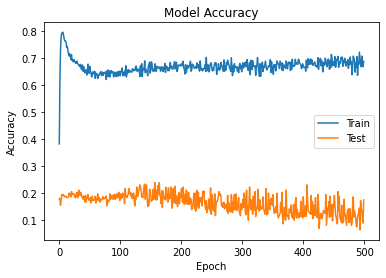

In [36]:
# YOUR CODE HERE
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!